# <center> Systematic Trading Strategies with Machine Learning Algorithms </center>

## <center> Coursework 2024-2025
</center>
<center>
<table class="tfo-notebook-buttons" style="margin-left: auto; margin-right: auto;">
  <tr>
    <td style="text-align: center; vertical-align: middle;">
      <a target="_blank" href="https://hm-ai.github.io/Systematic_Trading_Strategies_with_Machine_Learning_Algorithms/">
        <img src="https://drive.google.com/uc?export=view&id=1hTIoxoea8RTLgKb1oE6_PFmtTNPGs5p4" height="50"/>
        <br>Course page
      </a>
    </td>
    <td style="text-align: center; vertical-align: middle;">
      <a target="_blank" href="https://colab.research.google.com/drive/1---SysIELmc-zlDn5t3Ebm0H7vFQ41HB?usp=sharing">
        <img src="https://www.tensorflow.org/images/colab_logo_32px.png" height="50" />
        <br>Run in Google Colab
      </a>
    </td>
  </tr>
</table>
</center>

## Instructions

### Submission Format

Please submit your assignment as a **Jupyter Notebook** or as a combination of Python code files with a separate report.

For your submission:

- **Theoretical Questions**: Please provide clear, well-structured answers with relevant mathematical notation where appropriate. Take care to explain your reasoning and include any key insights.

- **Coding Questions**: Implement solutions with well-documented code that demonstrates your understanding.




# Part 1: Probabilistic Models and Sequence Analysis (50 marks)

This part explores Gaussian Mixture Models (GMMs) and Hidden Markov Models (HMMs) for analyzing sequential data. The assignment provides a matrix X of size (T, D) containing observations across T time steps in D dimensions.

This part is worth 50 marks in total, broken down across the following questions:

| Question | Type | Topic | Marks |
|----------|------|-------|-------|
| Q1 | Theoretical | GMM Parameterization | 5 |
| Q2 | Theoretical | GMM Log-Likelihood & EM Algorithm | 5 |
| Q3 | Theoretical | GMM Posterior Probability | 5 |
| Q4 | Coding | GMM Implementation & Parameter Estimation | 10 |
| Q5 | Coding | GMM Visualization & Clustering | 10 |
| Q6 | Theoretical | HMM Parameterization & Assumptions | 5 |
| Q7 | Theoretical | Forward-Backward Algorithm & EM for HMMs | 5 |
| Q8 | Theoretical | HMM State Forecasting Problem | 5 |


Total marks available: 50

In [5]:
# Prices
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
print("Loading HMM data...")
url = 'https://drive.google.com/uc?id=1YBEwyZblijkXiMad3mqqmaWwgQpiVlKl'
data_hmm = pd.read_csv(url)
X = data_hmm.values
print("✓ Loaded HMM data")

Loading HMM data...
✓ Loaded HMM data


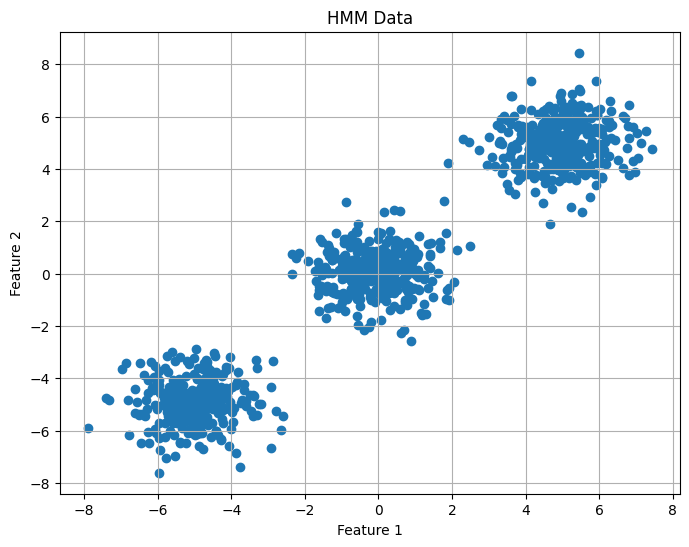

In [2]:
# Visualize the data
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1])
plt.title('HMM Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True)
plt.show()

In this part, we will work with a sequence of observation vectors generated from a Hidden Markov Model. Let us denote our data matrix as:

$$X = \begin{bmatrix}
— X_1^T — \\
— X_2^T — \\
\vdots \\
— X_T^T —
\end{bmatrix} \in \mathbb{R}^{T \times D}$$

where each $X_t \in \mathbb{R}^D$ is a $D$-dimensional observation vector at time $t$.

For the first subsection (Questions 1-5), we will consider these observations as independent and identically distributed (i.i.d.) random vectors, ignoring any potential temporal dependencies. This assumption allows us to model the data using a Gaussian Mixture Model (GMM). Later, in Questions 6-10, we will relax this assumption and explore Hidden Markov Models (HMMs) to capture the sequential nature of the data.

<center><img width="700" src = "https://drive.google.com/uc?export=view&id=11eu988-xUI18DApEkINomxjXHr2Ee__u"></center>

### Introducing Gaussian Mixture Models

---
<font color=green>Q1:</font> <br><font color='green'>
Consider the data matrix $X$ as a collection of independent and identically distributed (i.i.d.) observations $(X_1, \dots, X_T) \in \mathbb{R}^{T \times D}$.
Explain the parameterization of a Gaussian Mixture Model (GMM) with M=3 components for modeling the distribution of these D-dimensional vectors.
- What are the parameters of the model?
- What are the dimensions of each parameter?
- What are the constraints on these parameters?
</font>

---

---
<font color=green>Q2:</font> <br><font color='green'>
Derive the log-likelihood function $\log L(\theta | X)$ for a Gaussian Mixture Model with the observation matrix $X \in \mathbb{R}^{T \times D}$ and parameters $\theta = (\pi, \mu, \Sigma)$, where $\pi = (\pi_1, \pi_2, \pi_3)$ represents the mixture weights, $\mu = (\mu_1, \mu_2, \mu_3)$ the mean vectors, and $\Sigma = (\Sigma_1, \Sigma_2, \Sigma_3)$ the covariance matrices.

Explain how the Expectation-Maximization (EM) algorithm can be used to maximize this likelihood and learn the GMM parameters. What are the E-step and M-step in this context? Define any additional variables you introduce.
</font>

---

<center><img width="700" src = "https://drive.google.com/uc?export=view&id=11eu988-xUI18DApEkINomxjXHr2Ee__u"></center>


Let us introduce the hidden state variables for our GMM. For each observation vector $X_t \in \mathbb{R}^D$, we associate a discrete latent variable $Z_t \in \{1,2,3\}$ indicating which of the three Gaussian components generated that observation. These hidden states follow a categorical distribution with probabilities given by the mixture weights: $Z_t \sim \text{Categorical}(\pi_1, \pi_2, \pi_3)$. Under the i.i.d. assumption, the $Z_t$ variables are also independent of each other.

---
<font color=green>Q3:</font> <br><font color='green'>
In a GMM, after learning the parameters $\theta = (\pi, \mu, \Sigma)$, explain how to compute the posterior probability $p(Z_t = m | X_t = x_t, \theta)$ that an observation $x_t$ belongs to component $m$. Provide the mathematical formula and explain its interpretation.
</font>

---

---
<font color=green>Q4:</font> <br><font color='green'>
Implement the Expectation-Maximization algorithm to fit a Gaussian Mixture Model with M=3 components to the data matrix X (treating the rows as i.i.d. observations).
Your task:
1. Implement the GMM fitting either using a library of your choice (e.g., sklearn.mixture.GaussianMixture)
2. Set appropriate parameters for the model initialization (random_state=42 for reproducibility if using a library)
3. Print and interpret the learned parameters:
   - Mixture weights $\pi = (\pi_1, \pi_2, \pi_3)$
   - Mean vectors $\mu = (\mu_1, \mu_2, \mu_3)$
   - Covariance matrices $\Sigma = (\Sigma_1, \Sigma_2, \Sigma_3)$
</font>

---

---
<font color=green>Q5:</font> <br><font color='green'>
Using the GMM model trained in Question 4, compute the posterior probabilities and visualize the clustering results.
Your task:
1. Compute the posterior probabilities $p(Z_t = m | X_t = x_t, \theta)$ for each observation $t = 1,...,T$ and each mixture component $m = 1,2,3$
2. Create a scatter plot of the data in 2D with the following elements:
   - Each point colored according to its most likely component (use argmax of posterior probabilities)
   - Different colors for each of the three clusters
   - Plot the means of each component as larger points or markers
Ensure your visualization is properly labeled with axes, title, and a legend explaining the color coding of the clusters.
</font>
---

### Introducing Hidden Markov Models



Having explored Gaussian Mixture Models for clustering our data, we now introduce temporal dependencies by considering the sequential nature of our observations. In the HMM framework, we denote the hidden state at time $t$ as $H_t \in \{1,2,...,M\}$, where $M=3$ in our case. Unlike the GMM's latent variables $Z_t$ which are independent, the HMM's hidden states $H_t$ form a Markov chain with transition probabilities between states.



<center><img width="700" src = "https://drive.google.com/uc?export=view&id=1DxZsQBMG1-LMh3S0iXYGuBOxENcqFj_t"></center>

---
<font color=green>Q6:</font> <br><font color='green'>
Consider our observation matrix $X \in \mathbb{R}^{T \times D}$ where rows represent observations at consecutive time steps. We now model this data with a Hidden Markov Model (HMM) with hidden states $H_1, H_2, ..., H_T$ where each $H_t \in \{1,2,3\}$.
* Describe the complete parameterization of an HMM with Gaussian emissions:
   * Define the initial state distribution $\pi$
   * Define the transition matrix $Q$
   * Define the emission parameters $\mu$ and $\Sigma$
* For each parameter, specify its dimensions and any constraints it must satisfy.
* Formally state the two key assumptions of an HMM:
   * The Markov property for the hidden state sequence
   * The emission independence property
</font>

---

---
<font color=green>Q7:</font> <br><font color='green'>
For an HMM with parameters $\theta = (\pi, Q, \mu, \Sigma)$, we need to compute various posterior probabilities of the hidden states given observations. Let's explore the algorithms for these computations and their role in parameter estimation.
* The Forward-Backward algorithm computes two important sets of probabilities:
  * The filtering probabilities: $\xi(t,h) = P(H_t = h | X_{1:t})$ (probability of being in state $h$ at time $t$ given observations up to time $t$)
  * The smoothing probabilities: $\psi(t,h) = P(H_t = h | X_{1:T})$ (probability of being in state $h$ at time $t$ given all observations)
  * Explain how this algorithm works by:
    * Defining the forward variables $\alpha(t,h)$ and describing how they are recursively computed
    * Defining the backward variables $\beta(t,h)$ and describing how they are recursively computed
    * Showing how these variables are used to calculate $\xi(t,h)$ and $\psi(t,h)$
* The joint smoothing probability $\phi(t,h,h') = P(H_t = h, H_{t+1} = h' | X_{1:T})$ is also important.
  * Provide the formula for computing $\phi(t,h,h')$ in terms of $\alpha$ and $\beta$ variables
* Explain how these probabilities ($\psi$ and $\phi$) are used in the Expectation-Maximization (EM) algorithm:
  * What is computed in the E-step of the EM algorithm?
  * Derive the update formulas for all parameters ($\pi$, $Q$, $\mu$, $\Sigma$) in the M-step
</font>

---

---
<font color=green>Q8:</font> <br><font color='green'>
After fitting an HMM to the data, we often want to forecast future hidden states. Consider our fitted HMM with parameters $\theta = (\pi, Q, \mu, \Sigma)$ and our observation sequence $X_{1:T}$.
* Derive the formula for predicting the probability distribution of the hidden state at time $T+1$, i.e., $P(H_{T+1} = h | X_{1:T})$ for each $h \in \{1, 2, 3\}$
* Explain the intuition and meaning of each term in your formula
</font>
---

# Part 2: Challenge - Creating a Primary Model for Crypto Data using Trend Scanning Labeling (50 marks)



<center><img width="700" src = "https://drive.google.com/uc?export=view&id=1RHsxonTrnMFl1h0dSB_zr6CB2cxQLQkW"></center>


## Task Overview

Your task is to create a primary model that predicts binary signals (+1/-1) for cryptocurrency price movements. You will use data from 2018 to 2020 as your training period to develop and optimize your model, then evaluate its performance on the test period covering the entire year of 2021.


## Data

You will be provided with cryptocurrency price data including:
- OHLCV (Open, High, Low, Close, Volume) data

You can download the data using:

In [3]:
# Prices
print("Loading prices data...")
url = 'https://drive.google.com/uc?id=1P_5ykYLd5521QUdCxC_cMytdJ3PqESTw'
prices = pd.read_csv(url, parse_dates=True, index_col=0)
print("✓ Loaded prices")

Loading prices data...
✓ Loaded prices


In [4]:
prices.head(10)

,coin,open,high,low,close,volume
date,,,,,,
2018-01-01 01:00:00,BTC,13791.4,13804.9,13680.0,13680.0,5.922596
2018-01-01 02:00:00,BTC,13500.4,13600.0,13480.0,13514.0,9.326084
2018-01-01 03:00:00,BTC,13512.0,13576.4,13512.0,13560.2,11.704644
2018-01-01 04:00:00,BTC,13694.8,13809.8,13667.4,13667.4,17.126073
2018-01-01 05:00:00,BTC,13763.3,13887.9,13658.6,13765.0,9.322753
2018-01-01 06:00:00,BTC,13781.2,13849.4,13747.0,13747.0,26.133538
2018-01-01 07:00:00,BTC,14108.4,14224.0,14099.0,14168.7,12.534892
2018-01-01 08:00:00,BTC,13950.1,14120.4,13901.1,13922.1,9.495752
2018-01-01 09:00:00,BTC,13742.7,13884.0,13742.7,13785.0,6.781434


This part is worth 50 marks in total, broken down across the following sections:

| Section | Marks |
|---------|-------|
| Feature Engineering | 10 |
| Creating Labels | 10 |
| Model Development | 15 |
| Feature Importance Analysis | 10 |
| Model Evaluation | 5 |
| Optional Backtesting | 5 (bonus) |
| **Total** | **50** |

### 1. Feature Engineering (10 marks) 📊

Develop a set of features that might help predict cryptocurrency price movements. Consider:

- Technical indicators (momentum, volatility, trend)
- Relative strength indicators
- Moving averages and their crossovers
- Serial correlation features
- Time-lagged features
- Regimes from a Latent Variable Model.

### 2. Creating Labels (10 marks) 🏷️

Trend scanning labeling identifies upward and downward trends in price data by defining an observation window, computing t-values for linear regressions over this window, and selecting the most statistically significant trend.

For implementation guidance and examples, refer to Programming Sessions 1 and 5.

### 3. Model Development (15 marks) 🤖

For predicting cryptocurrency price movements, consider these modeling approaches:

- **Model Selection**:
  - Tree-based Models (Random Forests, XGBoost)
  - Neural Networks (vanilla or Recurrent Neural Networks)

- **Training Strategies**:
  - Rolling Window
  - Expanding Window
  - One-time prediction

- **Hyperparameter Optimization**:
  - Optimize your model parameters for best performance

Refer to Programming Sessions 4-7 for implementation guidance.

### 4. Feature Importance Analysis (5 marks) 🔍

For analyzing which features are most important for your cryptocurrency prediction model:

- Mean Decrease Impurity (MDI)
- Permutation Feature Importance (PFI)
- Perform analysis on a cluster level

Refer to Programming Session 2 for implementation guidance.

### 5. Model Evaluation (10 marks) 📈

Evaluate your model's performance on the test period using classification metrics (accuracy, precision, recall, F1-score) and confusion matrix analysis.

### Optional: Backtesting Performance (5 marks) 💹

Implement a backtesting framework to evaluate your strategy with these metrics:
- CAGR (Compound Annual Growth Rate)
- Volatility
- Sharpe Ratio
- Sortino Ratio
- Maximum Drawdown
- Average Holding Period
- Comparison with Buy and Hold Strategy

### Assessment Criteria 🎯

You will be judged primarily on:
1. Quality and creativity of your feature engineering 💡
2. Appropriateness of your model selection and training approach 🧠
3. Robustness of your implementation 🛡️
4. Critical analysis of your results 🔬
5. Code quality and documentation 📝

---
Note that you can achieve a high mark even if your strategy doesn't beat a buy-and-hold approach. The focus is on your methodology, not just performance.

---

### Final Submission Requirements 🚀

Your final code submission should include all five sections clearly implemented:

1. **Feature Engineering** 📊: Code that generates relevant technical and statistical features from the OHLCV data
2. **Creating Labels** 🏷️: Implementation of the trend scanning labeling approach
3. **Model Development** 🤖: Your chosen model implementation with appropriate training strategy
4. **Feature Importance Analysis** 🔍: Code to analyze and visualize which features are most important
5. **Model Evaluation** 📈: Implementation of performance metrics and visualization tools

Each section should be well-documented with comments explaining your approach and the rationale behind your design choices. Make sure your code is clean, efficient, and follows good programming practices. ✨

🌟🌟🌟 The best solution (in terms of approach and result) will be presented to JJ's team at Brevan Howard.

Good luck, have fun, and happy coding!

### Contact

If you have any question regarding this notebook, do not hesitate to contact: h.madmoun@imperial.ac.uk